In [3]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("matrix1.txt")
matrix2 = read_matrix_from_file("matrix2.txt")
result_matrix_cpp = read_matrix_from_file("result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


In [29]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals



sizes, computation_times = read_results("stats_8.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)

In [30]:
arr

,sizes,times
0,100,"[71, 61, 62, 58, 65, 67, 68, 66, 68, 62]"
1,200,"[183, 178, 188, 182, 181, 179, 189, 182, 180, ..."
2,300,"[347, 358, 342, 344, 353, 370, 368, 354, 344, ..."
3,400,"[627, 594, 602, 632, 649, 604, 585, 579, 601, ..."
4,500,"[962, 928, 992, 961, 941, 922, 972, 960, 929, ..."
5,600,"[1385, 1391, 1388, 1363, 1448, 1423, 1430, 142..."
6,700,"[1981, 1907, 1981, 2012, 1968, 1991, 1972, 194..."
7,800,"[2719, 2640, 2622, 2648, 2787, 2644, 2664, 276..."
8,900,"[3566, 3689, 3699, 3638, 3587, 3542, 3502, 361..."
9,1000,"[4788, 4822, 4786, 4908, 4891, 4960, 4801, 509..."


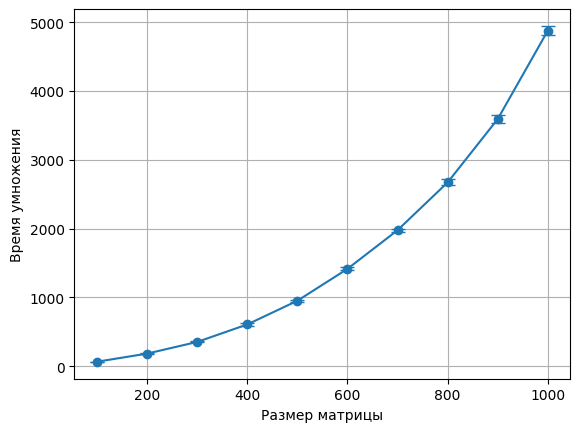

In [31]:

plot_intervals(sizes, intervals)